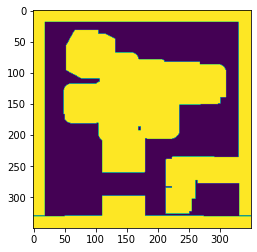

In [43]:
from matplotlib import pyplot as plt
import numpy as np
import heapq

x_cells = 350
y_cells = 350
x_size = 19
y_size = 19
      
map1 = np.load('map1.npy')
map2 = map1.copy()

# round all values to 0 or 1
for x in range(350):
    for i in range(350):
        if map1[x][i] < 0.5:
            map2[x][i] = 0
        else:
            map2[x][i] = 1

#create buffer zone size of robot radius
for x in range(x_cells):
    for y in range(y_cells):
        if map1[x][y] == 1:
            for i in range(-1 * x_size, x_size):
                for j in range(-1 * y_size, y_size):
                    if x + i < x_cells and y + j < y_cells:
                        map2[x + i][y + j] = 1

# rotate map and save
map2 = np.fliplr(np.rot90(map2,k=3))
plt.imshow(map2)
np.save("map_update", map2)




In [26]:
def e_dist(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

def convert_to_graph(env_map, x_size, y_size):

    graph_dict = {}
    for x in range(x_size):
        for y in range(y_size):
            neighbors = {}
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if x + i in range(x_size) and y + j in range(y_size) and (i != 0 or j != 0):
                        if env_map[x + i][y + j] == 0:
                            neighbors[(x + i, y + j)] = np.sqrt(i**2 + j**2)
            graph_dict[(x, y)] = neighbors
    return graph_dict

def path(prev, goal):
    if goal not in prev:
        return []
    else:
        return path(prev, prev[goal]) + [goal]

class Frontier_PQ:

    def __init__(self, start, cost):
        self.start = start
        self.cost = cost
        self.states = {start: cost}
        self.q = [(cost, start)]
        heapq.heapify(self.q)

    def contains(self, node):
        for elt in self.q:
            if elt[1] == node:
                return True
        return False

    def add(self, state, cost):
        heapq.heappush(self.q, (cost, state))
        if(state not in self.states):
            self.states[state] = cost

    def pop(self):
        return heapq.heappop(self.q)

    def replace(self, state, cost):
        self.states[state] = cost

def astar_search(start, goal, state_graph, heuristic, return_cost = False):

    # initialize explored set, frontier queue, and previous dict to track path
    explored = []
    frontier = Frontier_PQ(start, 0)
    previous = {start: None}

    # goal check
    if(start == goal):
        previous[goal] = start
        return (path(previous, goal), 0) if return_cost else (path(previous, goal))

    # loop while frontier isn't empty
    while(frontier.q):
        node = frontier.pop()
        while node[1] in explored:
            node = frontier.pop()

        neighbors = state_graph[node[1]]

        for succ in neighbors:

            if((not frontier.contains(succ)) and succ not in explored):

                # cost_to_succ is g, the cost to get to the successor; succ score is f = g + h
                cost_to_succ = frontier.states[node[1]] + state_graph[node[1]][succ]
                succ_score = cost_to_succ + heuristic(succ, goal)
                frontier.add(succ, succ_score)

                if(cost_to_succ <= frontier.states[succ]):
                    previous[succ] = node[1]
                    frontier.replace(succ, cost_to_succ)

        explored.append(node[1])
        if(goal in explored):
            pathToGoal = path(previous, goal)
            return (pathToGoal, pathcost(pathToGoal, state_graph)) if return_cost else (pathToGoal)

    print(explored[-50:-1])
    return ["failure"], -1 if return_cost else ["failure"]

def path_planner(sg, start, end):
    '''
    :param map: A 2D numpy array of size 360x360 representing the world's cspace with 0 as free space and 1 as obstacle
    :param start: A tuple of indices representing the start cell in the map
    :param end: A tuple of indices representing the end cell in the map
    :return: A list of tuples as a path from the given start to the given end in the given maze
    '''
    map_path = astar_search(start, end, sg, e_dist)
    print(map_path)
    world_path = []
    interval = max(int(len(map_path) / 20), 1)
    for i, elt in enumerate(map_path):
        if i % interval == 0:
            world_path.append((elt[0] * 7 / 350, elt[1] * 7 / 350))

    final = (map_path[1][0] * 7 / 350, map_path[1][1] * 7 / 350)
    if final not in world_path: world_path.append(final)

    return world_path

In [33]:
map_filename = np.load('map_update.npy')
env_map = np.transpose(map_filename)
state_graph = convert_to_graph(env_map, len(env_map), len(env_map[0]))

world_size = 7
map_size = len(env_map)

# start and goal, in 7x7 world coords
start_w = [6, 1]
end_w = [6.5, 6.5]

# Convert the start_w and end_W from webot's coordinate frame to map's
start = (int(start_w[0] * map_size / world_size),
         int(start_w[1] * map_size / world_size))
end = (int(end_w[0] * map_size / world_size),
         int(end_w[1] * map_size / world_size))

goals = path_planner(state_graph, start, end)
#print(goals)
# print(map_filename)


[(300, 50), (300, 51), (300, 52), (300, 53), (300, 54), (300, 55), (300, 56), (300, 57), (300, 58), (300, 59), (300, 60), (300, 61), (300, 62), (300, 63), (300, 64), (300, 65), (300, 66), (300, 67), (300, 68), (300, 69), (300, 70), (300, 71), (300, 72), (300, 73), (300, 74), (300, 75), (300, 76), (300, 77), (300, 78), (300, 79), (300, 80), (300, 81), (300, 82), (300, 83), (300, 84), (300, 85), (300, 86), (300, 87), (300, 88), (300, 89), (300, 90), (300, 91), (300, 92), (300, 93), (300, 94), (300, 95), (300, 96), (300, 97), (300, 98), (300, 99), (300, 100), (300, 101), (300, 102), (300, 103), (300, 104), (300, 105), (300, 106), (300, 107), (300, 108), (300, 109), (300, 110), (300, 111), (300, 112), (300, 113), (300, 114), (300, 115), (300, 116), (300, 117), (300, 118), (300, 119), (300, 120), (300, 121), (300, 122), (300, 123), (300, 124), (300, 125), (300, 126), (300, 127), (300, 128), (300, 129), (300, 130), (300, 131), (300, 132), (300, 133), (300, 134), (300, 135), (300, 136), (300,